## <font color="purple">20-NuclearReactions </font> (template)

In [2]:
import numpy as np, copy
import matplotlib.pyplot as plt
%matplotlib inline
from astropy import constants as const
import astropy.units as u
from astropy.units import cds
cds.enable() 

## 1. At home: pp vs CNO rates

> **TODO**
> 1. Make a plot of $\log(\epsilon)$ as a function of $\log(T)$ for the PP-I chain and the CNO cycle, based on the expression given in class (from Kip 18.5.1). Use the temperature range already given in the code below.
>
> 2. In both cases (PP-I and CNO), by how much does the $\epsilon$ changes for a change of temperature of one order of magnitude?
>
>3. If you were to reproduce $\epsilon$ in the range of temperature below by a power law of the form $\epsilon \propto T^\nu$, what would the index $\nu$ of the power law be? (Graph a curve to find your answer.)

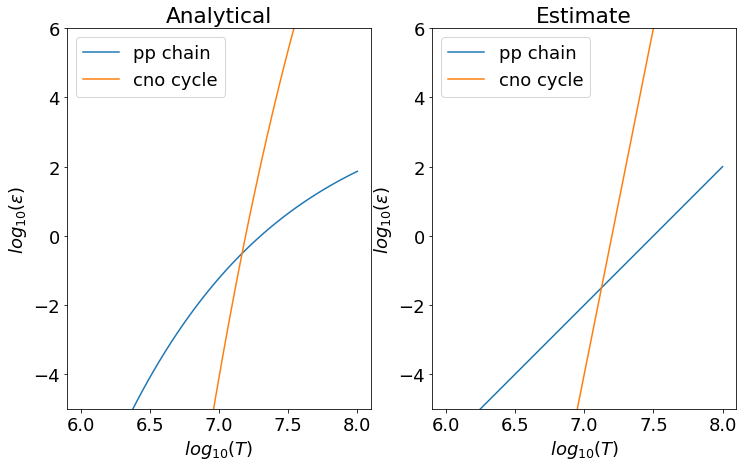

In [37]:
fig, ax = plt.subplots(1,2,figsize=(12,7))
ax[0].set_ylim(-5,6)
ax[1].set_ylim(-5,6)

logT = np.linspace(6,8,50)

dtype="i8,f8,|U8,f8,f8,f8"
url = 'https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L05-MeanMolecularWeight/05-Grevesse.txt'

AbundSol = np.genfromtxt(url, skip_header=1, names=True, dtype=dtype)

X = AbundSol['X']

rho = 1.410
T = (10**logT)/1e6

gpp = 1 + 0.0123 * T ** (1/3) + 0.0109 * T ** (2/3) + 0.0009 * T
xh = X[0]
eps_pp = np.log10(2.38e6 * gpp * rho * xh**2 * T ** -(2/3) * np.e ** (-33.8 / T**(1/3)))

gcno = 1 + 0.0027 * T ** (1/3) - 0.00778 * T ** (2/3) - 0.000149 * T
xcno = sum(X[1:])
eps_cno = np.log10(8.67e27 * gcno * rho * xh * xcno * T ** -(2/3) * np.e**(-152.83 / T**(1/3)))

ax[0].plot(logT, eps_pp, label='pp chain')
ax[0].plot(logT, eps_cno, label='cno cycle')

ax[0].set_ylabel(r'$log_{10}(\epsilon)$')
ax[0].set_xlabel(r'$log_{10}(T)$')

ax[0].set_title('Analytical')

ax[0].legend(loc=0)

ax[1].plot(logT, 4*(logT - 7.5), label='pp chain')
ax[1].plot(logT, 20*(logT - 7.2), label='cno cycle')

ax[1].set_ylabel(r'$log_{10}(\epsilon)$')
ax[1].set_xlabel(r'$log_{10}(T)$')

ax[1].set_title('Estimate')

ax[1].legend(loc=0)

> **TODO**: Write a caption for your graph, and answer the questions asked.

While the pp chain does increase with an increase in temperature, the CNO cycle increases dramatically over time. This is in line with the idea that there is a certain temperature requirement for the cno cycle to occur. While a single increase in order of magnitude for temperate means an increase in 2 orders of magnitude for the pp chain, it also means an increase in 20 orders of magnitude for the cno cycle.

## 2. Let's look at the energy generation in our MESA models



### Reading in the models

First, use the cell below to read in the two MESA models from the convection notebook for the Sun (in variable `Msun`) and for a 10 $M_\odot$ star (in variable `M10`). 

In [8]:
def read_model(file):

    return np.genfromtxt(file, skip_header=5, names=True)

Msun = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-Sun-profile8.data')
M10 = read_model('https://raw.githubusercontent.com/veropetit/PHYS633-S2022/main/L18-Convection/18-M10-profile8.data')

### 1. In class: we will look at the energy generation in the Solar model.

In MESA, the column named `eps_nuc` gives the total power per gram coming from all of the nuclear reactions. The columns `pp` and `cno` give the power/g coming from the PP (I, II, and III) chains and the CNO cycle, respectively. 

We will make a gapph of $\epsilon_\mathrm{nuc}$, $\epsilon_\mathrm{pp}$ and $\epsilon_\mathrm{cno}$ as a function of radius. 

### At home:

> **TODO** 
>
> 1. Make a similar plot for the 10$M_\odot$ model. In the interpretation box below, comment on the similarities/differences between the two models.
>
> 2. Use the analytical expression for $\epsilon_\mathrm{pp-1}$ and $\epsilon_\mathrm{cno}$ from Part 1 to calculate your expected values for $\epsilon_\mathrm{pp-1}$ and $\epsilon_\mathrm{cno}$ in both models, and add these curves to your plots. In the MESA model, you will some useful columns such as:
>    * 'logRho' for the logarithm10 of the density in g/cm$^2$
>    * 'logT' for the logarithm10 of the temperature in K
>    * 'h1' for the mass fraction of hydrogen
>    * 'c12', 'n14', 'o16','o18' for the mass fraction of important isotopes of carbon, nitrogen, and oxygen.
>
> 3. In the interpretation box below, compare your calculation in #2 to the real $\epsilon$s in the models. If there are any differences, comment on what could explain these discrepencies. 

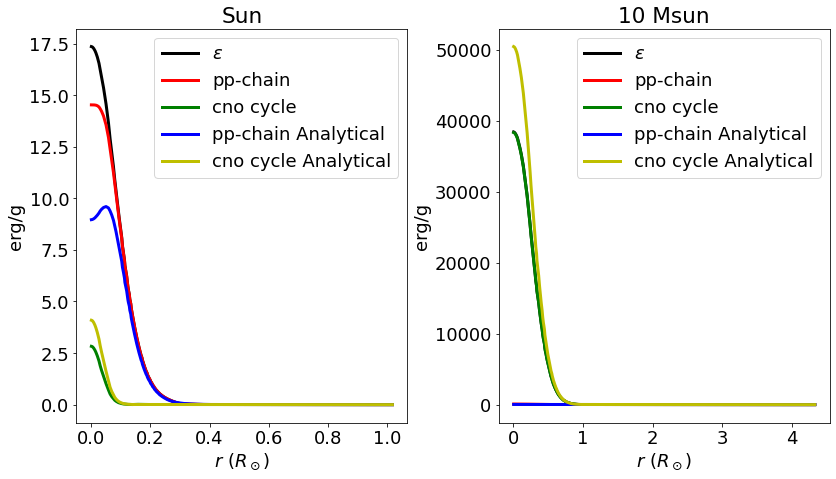

In [12]:
fig, ax = plt.subplots(1,2, figsize=(12,7))

ax[0].set_title('Sun')
ax[1].set_title('10 Msun')

ax[0].set_xlabel('$r$ ($R_\odot$)')
ax[1].set_xlabel('$r$ ($R_\odot$)')

ax[0].set_ylabel('erg/g')
ax[1].set_ylabel('erg/g')

plt.rcParams.update({'font.size': 18})
plt.tight_layout()


#########################
# In class

T = (10**Msun['logT'])/1e6

ax[0].plot(10**Msun['logR'], Msun['eps_nuc'], c='k', lw=3, label='$\epsilon$')
ax[0].plot(10**Msun['logR'], Msun['pp'], c='r', lw=3, label='pp-chain')
ax[0].plot(10**Msun['logR'], Msun['cno'], c='g', lw=3, label='cno cycle')

gpp = 1 + 0.0123 * T ** (1/3) + 0.0109 * T ** (2/3) + 0.0009 * T
xh = Msun['h1']
eps_pp = 2.38e6 * gpp * xh**2 * 10**Msun['logRho'] * T ** (-(2/3)) * np.e ** (-33.8 / T ** (1/3))

gcno = 1 + 0.0027 * T ** (1/3) - 0.00778 * T ** (2/3) - 0.000149 * T
xcno = Msun['c12'] + Msun['n14'] + Msun['o16'] + Msun['o18']
eps_cno = 8.67e27 * gcno * (10**Msun['logRho']) * xh * xcno * T ** -(2/3) * np.e**(-152.83 / T**(1/3))

ax[0].plot(10**Msun['logR'], eps_pp, c='b', lw=3, label='pp-chain Analytical')
ax[0].plot(10**Msun['logR'], eps_cno, c='y', lw=3, label='cno cycle Analytical')

ax[0].legend(loc=0)
#########################
# At home

T = (10**M10['logT'])/1e6

ax[1].plot(10**M10['logR'], M10['eps_nuc'], c='k', lw=3, label='$\epsilon$')
ax[1].plot(10**M10['logR'], M10['pp'], c='r', lw=3, label='pp-chain')
ax[1].plot(10**M10['logR'], M10['cno'], c='g', lw=3, label='cno cycle')

gpp = 1 + 0.0123 * T ** (1/3) + 0.0109 * T ** (2/3) + 0.0009 * T
xh = M10['h1']
eps_pp = 2.38e6 * gpp * xh**2 * 10**M10['logRho'] * T ** (-(2/3)) * np.e ** (-33.8 / T ** (1/3))

gcno = 1 + 0.0027 * T ** (1/3) - 0.00778 * T ** (2/3) - 0.000149 * T
xcno = M10['c12'] + M10['n14'] + M10['o16'] + M10['o18']
eps_cno = 8.67e27 * gcno * (10**M10['logRho']) * xh * xcno * T ** -(2/3) * np.e**(-152.83 / T**(1/3))

ax[1].plot(10**M10['logR'], eps_pp, c='b', lw=3, label='pp-chain Analytical')
ax[1].plot(10**M10['logR'], eps_cno, c='y', lw=3, label='cno cycle Analytical')

ax[1].legend(loc=0)


> **TODO** Write a caption for your graph, and answer the questions asked. 

In the sun, the pp chain is where most of the energy capacity exists. In the core, since the sun does not have the temperature to take full advantage of the cno cycle, this is an expected outcome. In the 10M star, the cno cycle is dominant. The nuclear epsilon is almost identical to the cno epsilon. The analytical estimates are closely related to their counterparts, however, they are more different the closer you get to the core.